## Objective: practice gesture recognition with YOLOv4
### Setup Darknet

In [ ]:
# Setup Darknet
! git clone https://github.com/AlexeyAB/darknet.git
! sed -i "s/GPU=0/GPU=1/g" /content/darknet/Makefile
! sed -i "s/CUDNN=0/CUDNN=1/g" /content/darknet/Makefile
! sed -i "s/OPENCV=0/OPENCV=1/g" /content/darknet/Makefile
! head darknet/Makefile
! cd darknet; make

In [ ]:
# Download Yoloc4.weights
! cd darknet; gdown https://drive.google.com/uc?id=1cewMfusmPjYWbrnuJRuKhPMwRe_b9PaT 

In [ ]:
# Download Yolov4 Trainging Weights
! cd darknet; gdown https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137

In [ ]:
# Download Yolov4-tiny.weights
! cd darknet; gdown https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v4_pre/yolov4-tiny.weights

In [ ]:
# Download Yolov4-tiny Training Weights
!cd darknet; gdown https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v4_pre/yolov4-tiny.conv.29

Downloading...
From: https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v4_pre/yolov4-tiny.conv.29
To: /content/darknet/yolov4-tiny.conv.29
100% 19.8M/19.8M [00:00<00:00, 22.8MB/s]


In [ ]:
!cd darknet; mkdir img

### Copy training image files and edit config file

In [ ]:
# Copy files from Gdrive to Colab
!cp  /content/drive/My\ Drive/darknet/srp/* /content/darknet/img

In [ ]:
# Init

path='img/'
backup='img'

# Count classes
with open('darknet/'+path+'classes.txt','r') as f:
  classes=len(f.readlines())

# Create function for read file
def read_file(file, show=False):
  print(file+':\n')
  with open(file,'r') as f:
    lines=f.readlines()
    if show==True:
      for line in lines:
        print(line.strip('\n'))
    else: return lines    

In [ ]:
# Create Data file

with open('darknet/'+path+'img.data','w') as f:
  f.write('classes= '+str(classes)+'\n')
  f.write('train= '+path+'train.txt \n')
  f.write('valid= '+path+'train.txt \n')
  f.write('names= '+path+'classes.txt \n')
  f.write('backup= '+backup)

read_file('darknet/'+path+'img.data',show=True)   

darknet/img/img.data:

classes= 1
train= img/train.txt 
valid= img/train.txt 
names= img/classes.txt 
backup= img


In [ ]:
# Create train.txt for images
import os

files=os.listdir('darknet/'+path)
with open('darknet/'+path+'train.txt','w') as f:
  for file in files:
   #if file.lower().endswith(img):
   if file.lower()[-3:] in ['bmp','jpg']:
     f.write(path+file+'\n')

read_file('darknet/'+path+'train.txt', show=True)


darknet/img/train.txt:

img/20.jpg
img/11.jpg
img/18.jpg
img/1.jpg
img/7.jpg
img/14.jpg
img/12.jpg
img/19.jpg
img/16.jpg
img/17.jpg
img/2.jpg
img/10.jpg
img/3.jpg
img/6.jpg
img/15.jpg
img/8.jpg
img/13.jpg


In [ ]:
# Create tiny-cfg file
org='/content/darknet/cfg/yolov4-tiny.cfg'
tgt='/content/darknet/'+path+'img-tiny.cfg'

lines=read_file(org)
with open(tgt,'w') as f:
  for line in lines:
    if line=='filters=255\n':
      line='filters='+str((classes+5)*3)+'\n'
    if line=='classes=80\n':
      line='classes='+str(classes)+'\n'
    f.write(line)    
    

/content/darknet/cfg/yolov4-tiny.cfg:



### Start training

In [ ]:
# Train Yolov4
#! cd darknet; ./darknet detector train srp/srp.data srp/srp-tiny.cfg  yolov4.conv.137 -dont_show

In [ ]:
# Copy files from Colab to Gdrive 
!cp /content/darknet/img/img-tiny_last.weights /content/drive/My\ Drive/darknet/srp

In [ ]:
# Train Yolov4-tiny
! cd darknet; ./darknet detector train img/img.data img/img-tiny.cfg  yolov4-tiny.conv.29 -dont_show

In [ ]:
# Keep training Yolov4-tiny

! cd darknet; ./darknet detector train img/img.data img/img-tiny.cfg  img/img-tiny_last.weights -dont_show 


In [ ]:
# mAP check
!cd darknet; ./darknet detector map img/img.data img/img-tiny.cfg img/img-tiny_2000.weights

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7 	                           ->  104 x 104 x 128 
   9 max                2x 2/ 2   

### Test

In [ ]:
! pip install opencv-python --upgrade

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

def det(file,names,net):
  frame=cv2.imread(file)
  
  classes, confidences, boxes= net.detect(frame, confThreshold=0.1, nmsThreshold=0.4)
  for classID, confidence, box in zip(classes.flatten(),confidences.flatten(),boxes):
    label='%.2f' % confidence
    label='%s: %s' % (names[classID],label)
    labelSize,baseline=cv2.getTextSize(label,cv2.FONT_HERSHEY_SIMPLEX,0.5,1)
    left,top,width,height=box
    top=max(top,labelSize[1])
    cv2.rectangle(frame,box,color=(0,255,0),thickness=3)
    cv2.rectangle(frame,(left,top-labelSize[1]),(left+labelSize[0],top+baseline),(255,255,255),cv2.FILLED)
    cv2.putText(frame,label,(left,top),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,0))

  cv2_imshow(frame)

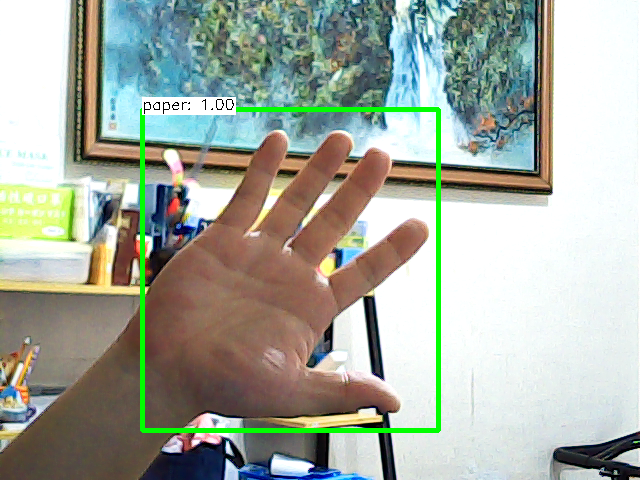

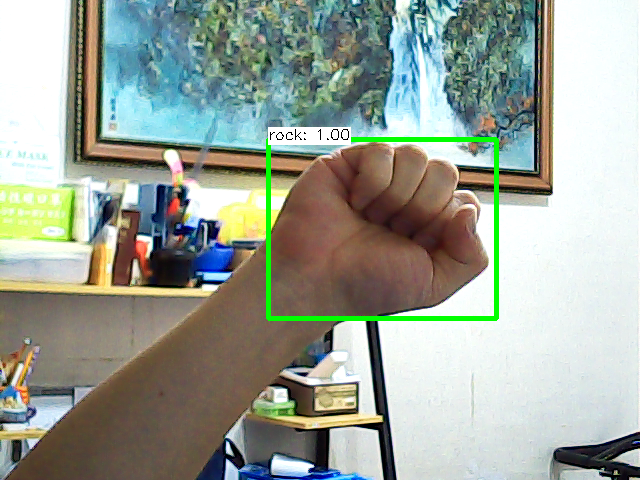

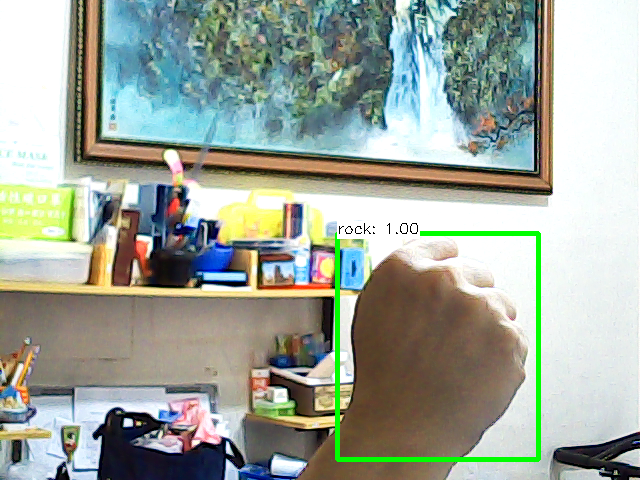

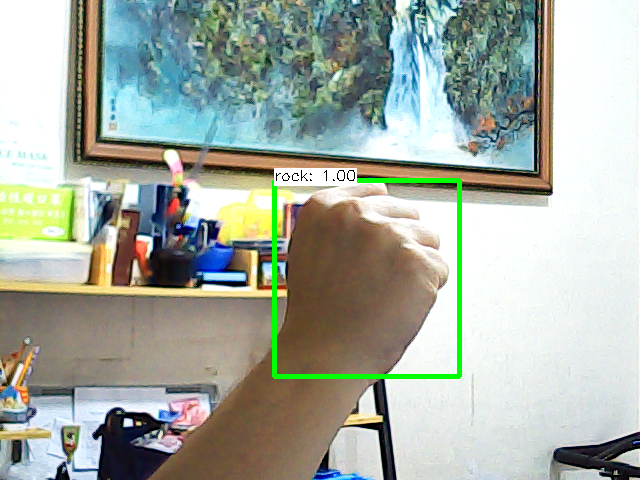

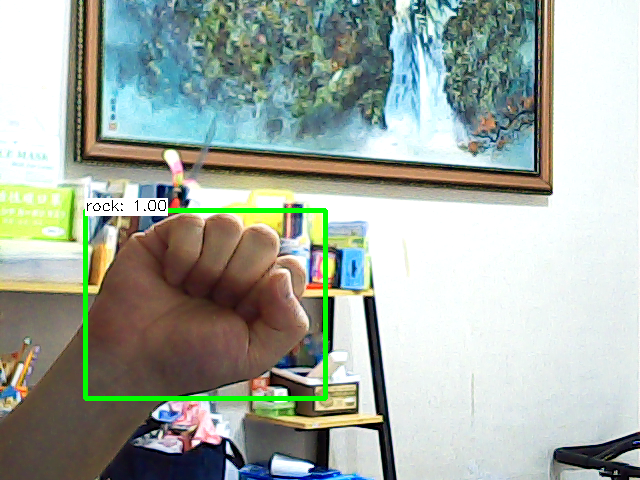

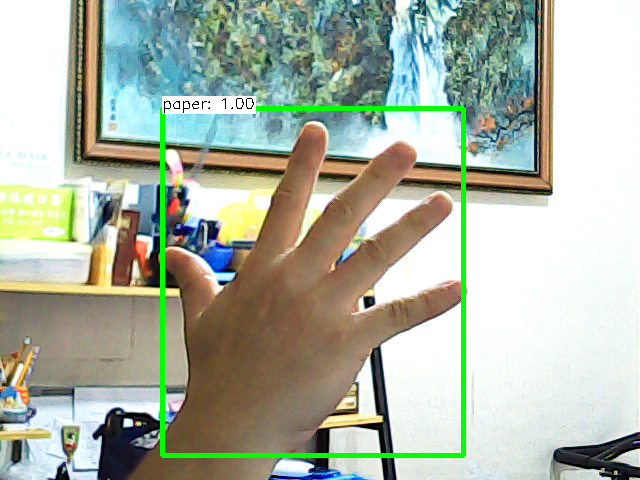

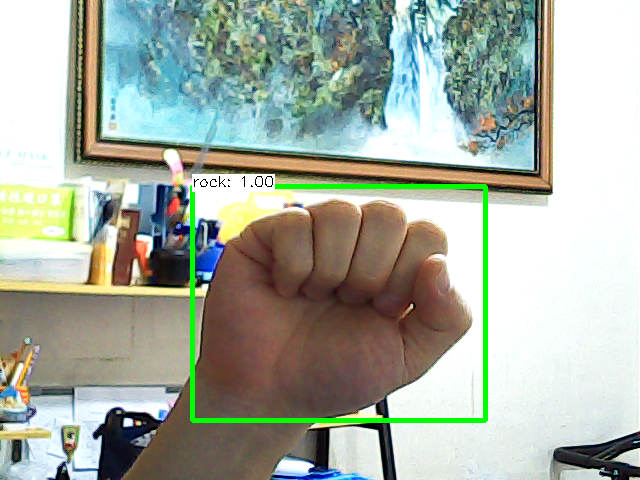

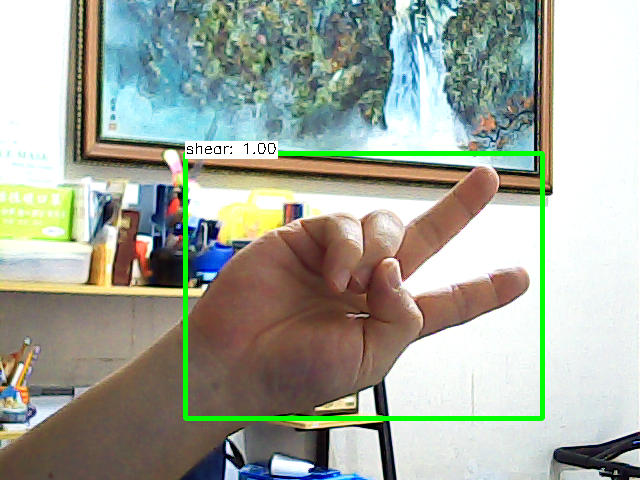

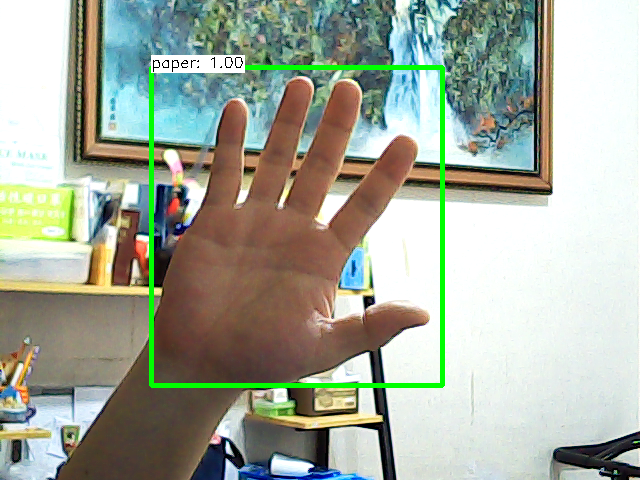

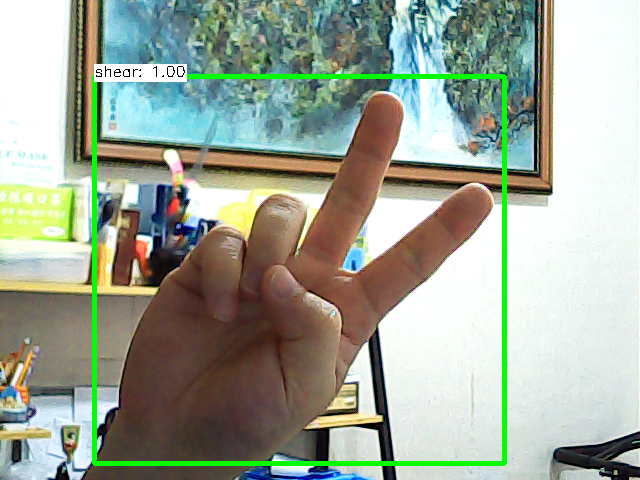

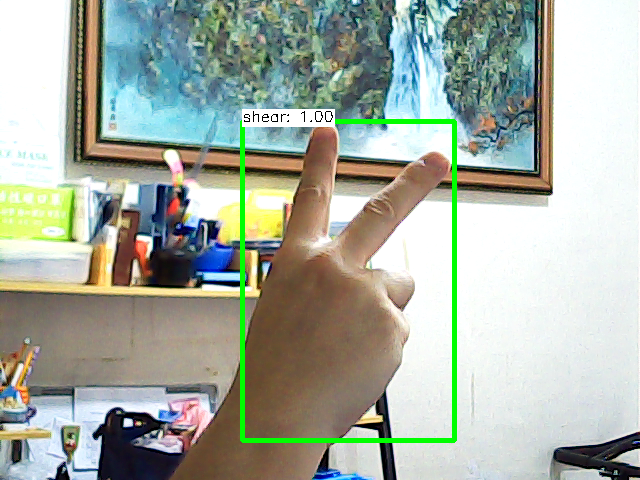

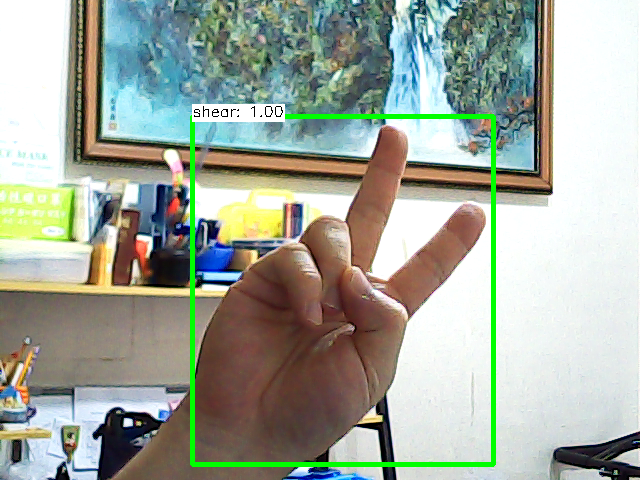

In [ ]:

net=cv2.dnn_DetectionModel('/content/darknet/img/img-tiny.cfg','/content/darknet/img/img-tiny_last.weights')
net.setInputSize(416,416)
net.setInputScale(1./255)
net.setInputSwapRB(True)

with open('/content/darknet/img/classes.txt','rt') as f:
    names=f.read().rstrip('\n').split('\n')  

for file in files:
  if file.lower()[-3:] in ['bmp','jpg']:
    det('/content/darknet/img/'+file,names,net)




## Conclusion: YOLOv4 could work well for gesture recognition